In [2]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import time

In [28]:
def plot_tsne(tsne_df, data):
    tsne_df["LN_IC50"] = data["LN_IC50"]
    tsne_df["AUC"] = data["AUC"]

    # Create the plots side by side
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Plot 1: Coloring by LN_IC50
    scatter1 = axs[0].scatter(tsne_df["TSNE1"], tsne_df["TSNE2"],
                              c=tsne_df["LN_IC50"], cmap='viridis', label="LN_IC50", s=1)
    fig.colorbar(scatter1, ax=axs[0], label="LN_IC50")
    axs[0].set_title("t-SNE Results Colored by LN_IC50")
    axs[0].set_xlabel("t-SNE 1")
    axs[0].set_ylabel("t-SNE 2")

    # Plot 2: Coloring by AUC
    scatter2 = axs[1].scatter(
        tsne_df["TSNE1"], tsne_df["TSNE2"], c=tsne_df["AUC"], cmap='coolwarm', label="AUC", s=1)
    fig.colorbar(scatter2, ax=axs[1], label="AUC")
    axs[1].set_title("t-SNE Results Colored by AUC")
    axs[1].set_xlabel("t-SNE 1")
    axs[1].set_ylabel("t-SNE 2")

    # Show the plot
    plt.tight_layout()
    plt.show()

In [19]:
def apply_tsne(data, components=2, perplexity=30):
    # Extract gene features, dropping LN_IC50 and AUC
    gene_features = data.drop(columns=["LN_IC50", "AUC"])

    start_time = time.time()
    # Fit t-SNE
    tsne = TSNE(n_components=components,
                perplexity=perplexity, random_state=42)
    tsne_results = tsne.fit_transform(gene_features)

    end_time = time.time()
    print(f"""t-SNE: components: {components}, perplexity:{
          perplexity} took {(end_time - start_time):.2f} seconds""")

    # Create DataFrame for t-SNE results
    tsne_df = pd.DataFrame(tsne_results, columns=[
                           f"TSNE{i+1}" for i in range(components)])
    plot_tsne(tsne_df, data)


t-SNE: components: 2, perplexity:20 took 896.06 seconds


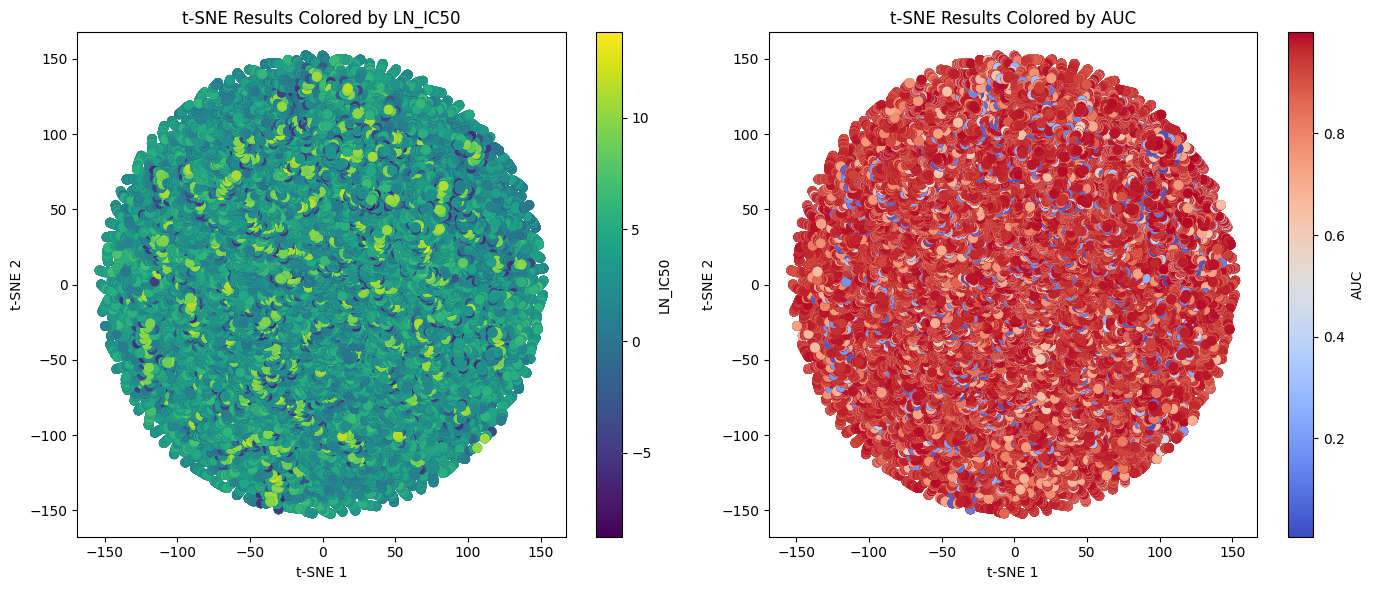

t-SNE: components: 2, perplexity:30 took 1004.38 seconds


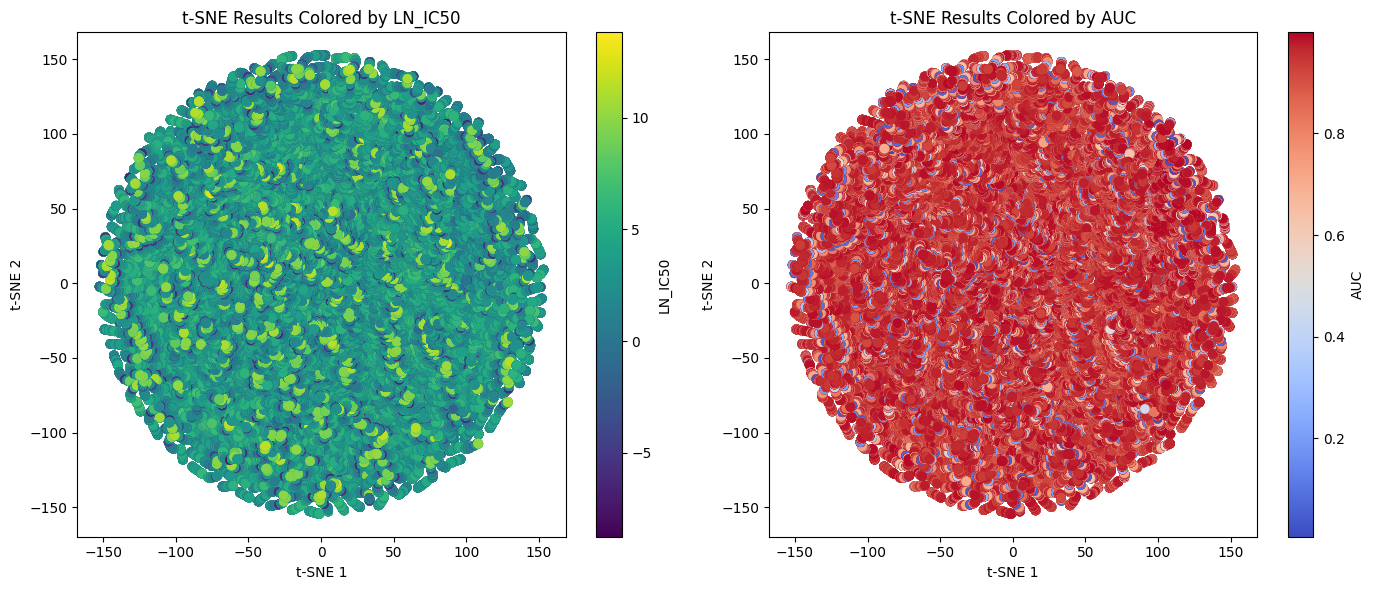

t-SNE: components: 2, perplexity:50 took 1106.08 seconds


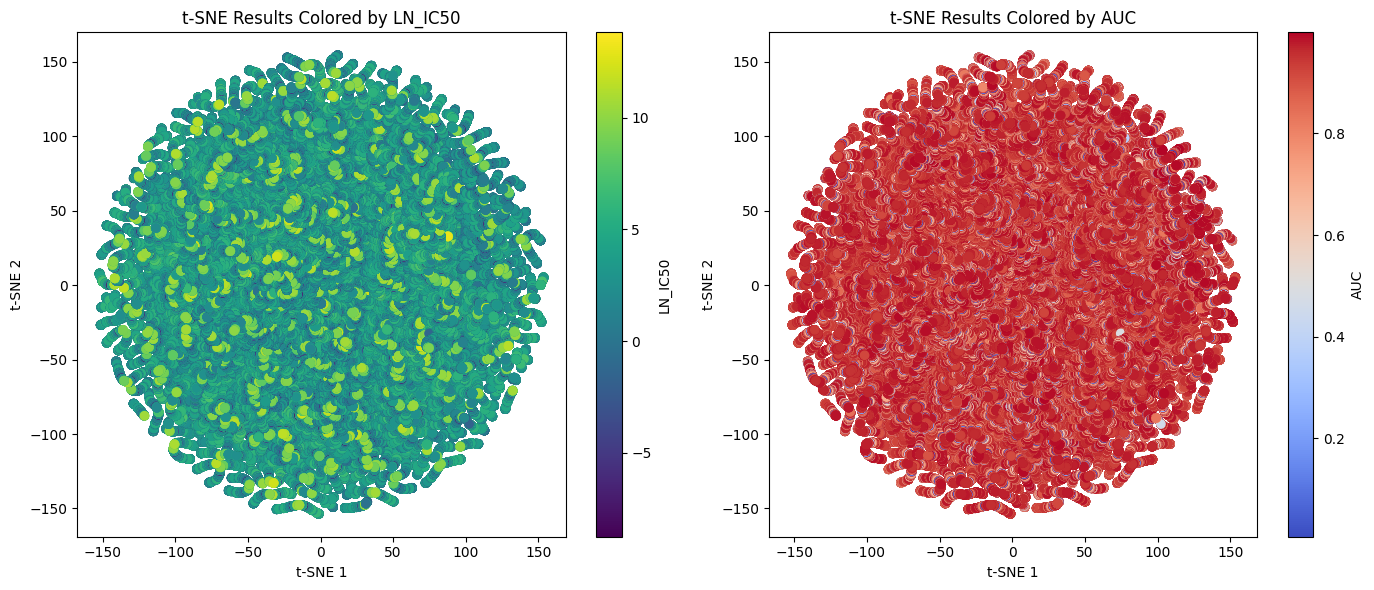

In [4]:
data = pd.read_csv("data/final_dataset.csv")
for i in [20, 30, 50]:
    apply_tsne(data, components=2, perplexity=i)

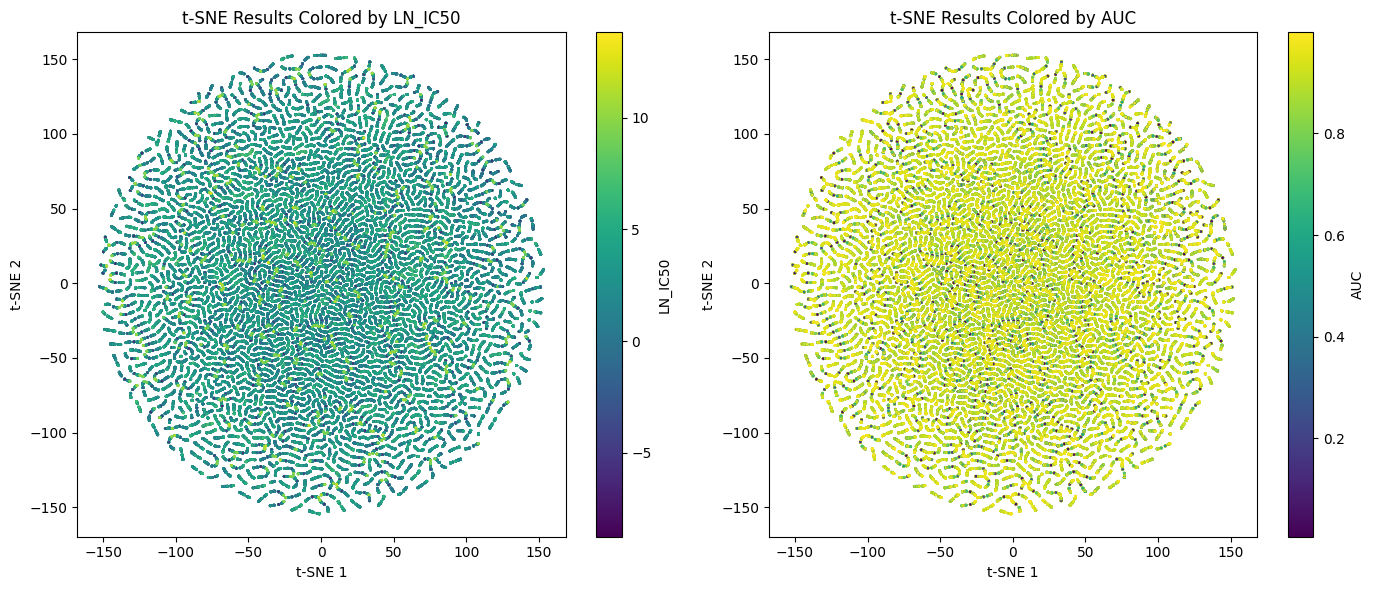

In [27]:
import pickle
with open("data/pickle/tsne_n2_ppl30.pkl", 'rb') as f:
    tsne_results = pickle.load(f)
    tsne_df = pd.DataFrame(tsne_results, columns=[
                           f"TSNE{i+1}" for i in range(2)])
    plot_tsne(tsne_df, data)